In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

# (Signed) Antisparse Correlated ($[1 \quad \rho \quad \rho^2 \quad \rho^3]$)

In [2]:
df_anti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV3.pkl")[['Model','rho', 'SINR']]
df_anti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV4.pkl")[['Model','rho', 'SINR']]
df_anti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_antisparseV5.pkl")[['Model','rho', 'SINR']]
df_anti_results = pd.concat([df_anti_results1,df_anti_results2, df_anti_results3], axis = 0)
# print('Shape : {}'.format(df_anti_results.shape))
print('Number of diverge cases for WSM is : ', df_anti_results.loc[(df_anti_results['SINR'] == -999) & (df_anti_results['Model'] == 'WSM')].shape[0])

df_anti_results = df_anti_results.loc[df_anti_results['SINR'] != -999]
results = df_anti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_anti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

Number of diverge cases for WSM is :  0


,rho,WSM,BSM,ICA,LDMI,PMF
0,0.0,28.276454,26.471943,30.632126,30.066942,30.551120
1,0.1,27.266362,21.904553,24.681539,30.076406,30.541990
2,0.2,26.613537,17.033875,19.523120,29.833477,30.389886
3,0.3,24.837971,13.629624,16.057969,28.989799,29.937409
4,0.4,24.001477,10.947671,13.429869,29.343035,29.969653
5,0.5,22.195529,8.656070,11.223060,27.354103,29.739524
6,0.6,20.819505,6.636341,9.242887,26.307798,29.379456
7,0.7,18.511871,4.603956,7.347987,20.798454,28.834539
8,0.8,15.613431,2.523106,5.338396,13.963985,27.648785


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


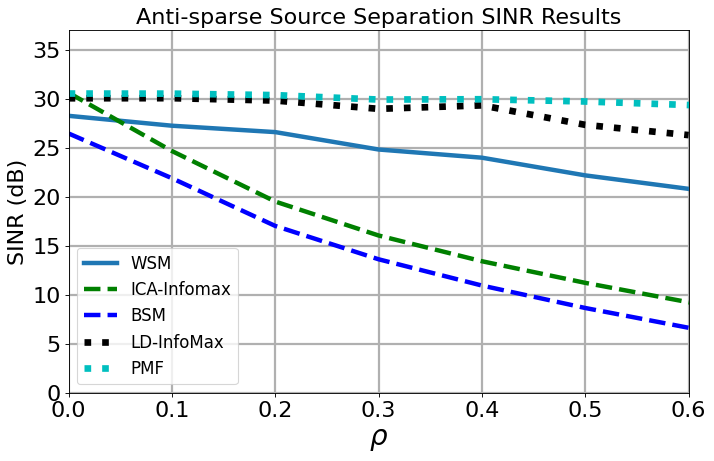

In [3]:
SetPlotRC()

SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()
SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRBSM = results.loc[results['Model'] == 'BSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRWSM,'-', linewidth=4, label = "WSM")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRBSM,'b--',linewidth=4, label = "BSM")
plt.plot(rholist[:7],SINRLDMI[:7],'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF,'c:',linewidth=6, label = "PMF")
gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.6,-0,37])
plt.title('Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())

In [4]:
# results.loc[results['Model'] == 'WSM']

# Nonnegative Antisparse Correlated ($[1 \quad \rho \quad \rho \quad \rho \quad \rho]$)

In [5]:
df_nnanti_results1 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV1.pkl")[['Model','rho', 'SINR']]
df_nnanti_results2 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV2.pkl")[['Model','rho', 'SINR']]
df_nnanti_results3 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV3.pkl")[['Model','rho', 'SINR']]
df_nnanti_results4 = pd.read_pickle(r"../Results/simulation_results_correlated_nnantisparseV4.pkl")[['Model','rho', 'SINR']]

df_nnanti_results = pd.concat([
                                df_nnanti_results1, 
                                df_nnanti_results2, 
                                df_nnanti_results3,
                                df_nnanti_results4], axis = 0)

# print('Shape : {}'.format(df_nnanti_results.shape))
# print('Number of diverge cases for WSM is : ', df_nnanti_results.loc[(df_nnanti_results['SINR'] == -999) & (df_nnanti_results['Model'] == 'WSM')].shape[0])

df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()
table = pd.DataFrame(columns = (["rho"] + list(df_nnanti_results['Model'].unique())))
table['rho'] = np.array([0.1*j for j in range(9)])
for m in list(table.columns[1:]):
    table[m] = results.loc[results['Model'] == m]['SINR'].values
    
table

,rho,NSM,ICA,LDMI,PMF,WSM
0,0.0,35.558604,30.546521,36.244541,36.450218,24.835001
1,0.1,24.280632,21.630873,36.083232,36.224639,24.593855
2,0.2,17.996615,16.395038,36.113653,36.133368,24.843474
3,0.3,14.029329,13.139630,36.067037,35.964326,24.993376
4,0.4,10.980885,10.729601,35.958153,35.697257,24.252274
5,0.5,8.375478,8.748044,35.775587,35.330946,22.791388
6,0.6,5.891840,6.971597,35.429045,34.829684,22.216956
7,0.7,4.124047,4.034315,34.341869,33.662259,20.780594
8,0.8,3.111439,3.986225,31.893148,31.927173,17.805073


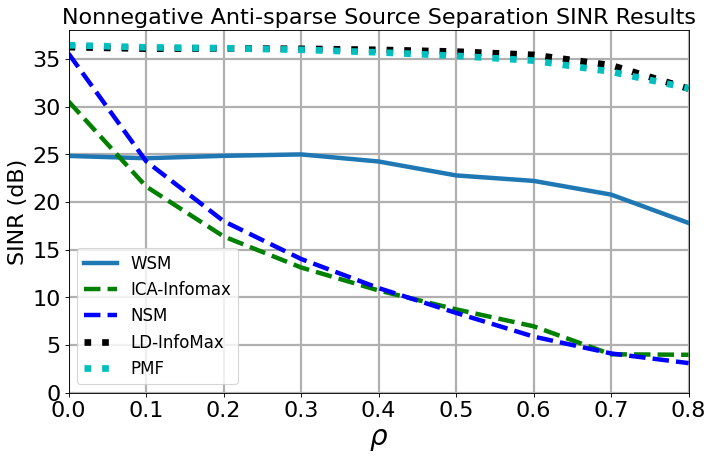

In [6]:
# df_nnanti_results = pd.concat([
#                                df_nnanti_results1, 
#                                df_nnanti_results2, 
#                                df_nnanti_results3,
#                                df_nnanti_results4
#                               ],
#                               axis = 0)
# print('Shape : {}'.format(df_nnanti_results.shape))

# df_nnanti_results = df_nnanti_results.loc[df_nnanti_results['SINR'] != -999]
# results = df_nnanti_results[['Model', 'rho', 'SINR']].groupby(['Model', 'rho']).agg({'rho':'size', 'SINR':'mean'}).rename(columns={'rho':'count','SINR':'SINR'}).reset_index()

SetPlotRC()

SINRIca = results.loc[results['Model'] == 'ICA']['SINR'].to_numpy()
SINRNSM = results.loc[results['Model'] == 'NSM']['SINR'].to_numpy()
SINRLDMI = results.loc[results['Model'] == 'LDMI']['SINR'].to_numpy()
SINRPMF = results.loc[results['Model'] == 'PMF']['SINR'].to_numpy()
SINRWSM = results.loc[results['Model'] == 'WSM']['SINR'].to_numpy()

rholist = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
fh2=plt.figure(figsize=(10, 6), dpi=80)

plt.plot(rholist,SINRWSM,'-', linewidth=4, label = "WSM")
plt.plot(rholist,SINRIca,'g--',linewidth=4, label = "ICA-Infomax")
plt.plot(rholist,SINRNSM,'b--',linewidth=4, label = "NSM")
plt.plot(rholist,SINRLDMI,'k:',linewidth=6, label = "LD-InfoMax")
plt.plot(rholist,SINRPMF, 'c:', linewidth=6, label = "PMF")

gh=plt.grid(linewidth=2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('SINR (dB)',fontsize=25)
plt.xlabel(r"$\rho$",fontsize=25)
plt.legend(loc='lower left',fontsize=15)
plt.axis([0.0,0.8,-0,38])
plt.title('Nonnegative Anti-sparse Source Separation SINR Results',fontsize=20)
ApplyFont(plt.gca())
# plt.savefig('Figures/WSM_NNAntisparse_CorrelatedV2.pdf', format='pdf')

In [7]:
# results.loc[results['Model'] == 'WSM']